# Iris Flower Classification

Welcome! In this notebook, we'll walk through building a machine learning model to classify iris flowers into their species: *setosa*, *versicolor*, or *virginica*. We'll use the classic Iris dataset, which is a great starting point for learning about classification problems.

Here's what we'll do:

1. Load the data and take a quick look at its structure.
2. Visualize some basic relationships in the data.
3. Split the data into training and test sets.
4. Train a classification model.
5. Evaluate how well our model performs and look at the confusion matrix.

Let's get started!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC


In [2]:
# Load Iris dataset (uploaded as IRIS.csv)
df = pd.read_csv('IRIS.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for missing values
print(df.isnull().sum())

# Encode species labels to numeric
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

# Feature matrix and target vector
X = df.drop('species', axis=1)
y = df['species']

# Train‑test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling (optional but can help SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# Train a Support Vector Classifier
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train, y_train)


SVC()

Accuracy: 96.67%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



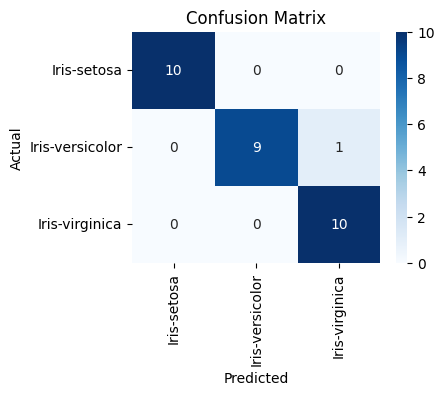

In [5]:
# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc:.2%}')

# Classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Conclusion

Our Support Vector Machine model performed really well on the Iris dataset! This shows that measurements like sepal and petal length and width are excellent predictors for iris species.

Feel free to try out other algorithms, such as **K-Nearest Neighbors**, **Random Forest**, or **Logistic Regression**, and see how they compare. Happy experimenting!